In [30]:
import pandas as pd
data = pd.read_csv('./train.csv')
data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


날짜, 아이템id, 판매량으로 나누고  
날짜를 datetime 형식으로 바꿈

In [31]:
data = data[data['store_nbr'] == 1]
data = data[['date', 'family', 'sales']]
data

,date,family,sales
0,2013-01-01,AUTOMOTIVE,0.000000
1,2013-01-01,BABY CARE,0.000000
2,2013-01-01,BEAUTY,0.000000
3,2013-01-01,BEVERAGES,0.000000
4,2013-01-01,BOOKS,0.000000
...,...,...,...
2999134,2017-08-15,POULTRY,234.892000
2999135,2017-08-15,PREPARED FOODS,42.822998
2999136,2017-08-15,PRODUCE,2240.230000
2999137,2017-08-15,SCHOOL AND OFFICE SUPPLIES,0.000000


아이템의 빈도수를 출력

In [32]:
data.value_counts('family').to_csv('value_counts.csv')

In [33]:
data['family'].unique().size

33

In [34]:
items = []
for i in data['family'].unique():
    items.append(data[data['family'] == i])

In [35]:
items[2]

,date,family,sales
2,2013-01-01,BEAUTY,0.0
1784,2013-01-02,BEAUTY,2.0
3566,2013-01-03,BEAUTY,0.0
5348,2013-01-04,BEAUTY,3.0
7130,2013-01-05,BEAUTY,3.0
...,...,...,...
2991980,2017-08-11,BEAUTY,1.0
2993762,2017-08-12,BEAUTY,3.0
2995544,2017-08-13,BEAUTY,1.0
2997326,2017-08-14,BEAUTY,6.0


target 데이터를 ds, y로 전처리

In [36]:
item0 = items[2][['date','sales']]
item0.columns = ['ds', 'y']
item0

,ds,y
2,2013-01-01,0.0
1784,2013-01-02,2.0
3566,2013-01-03,0.0
5348,2013-01-04,3.0
7130,2013-01-05,3.0
...,...,...
2991980,2017-08-11,1.0
2993762,2017-08-12,3.0
2995544,2017-08-13,1.0
2997326,2017-08-14,6.0


In [37]:
from prophet import Prophet

prophet = Prophet()
prophet.fit(item0)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -24.9676
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2402.08   0.000671002       80.3782      0.1567           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       2402.09   0.000549089       82.0457   7.147e-06       0.001      191  LS failed, Hessian reset 
     189       2402.15   2.13517e-06       66.2085     0.01733           1      300   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [38]:
future = prophet.make_future_dataframe(periods=7, freq='D')
future

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
1686,2017-08-18
1687,2017-08-19
1688,2017-08-20
1689,2017-08-21


In [39]:
forecast = prophet.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']]

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,2013-01-01,1.936938,-0.332760,4.235589
1,2013-01-02,1.950099,-0.459080,4.084043
2,2013-01-03,1.872118,-0.452969,3.930346
3,2013-01-04,1.677583,-0.461393,3.934007
4,2013-01-05,2.022823,-0.204258,4.309790
...,...,...,...,...
1686,2017-08-18,3.580951,1.181388,5.855940
1687,2017-08-19,3.970313,1.742681,6.345638
1688,2017-08-20,2.522730,0.233229,4.859995
1689,2017-08-21,3.925799,1.495675,6.170468


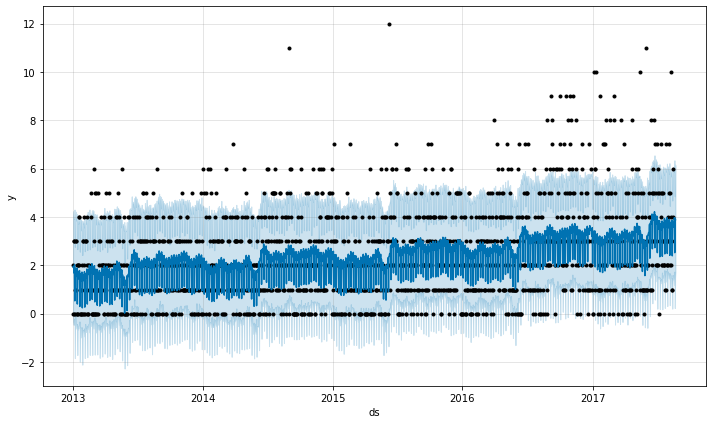

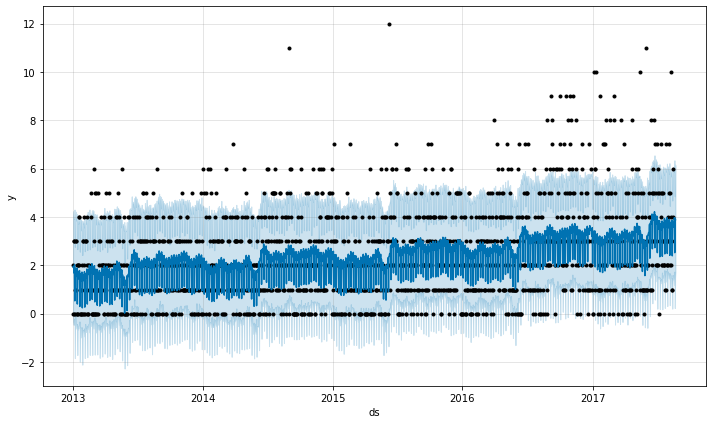

In [40]:
prophet.plot(forecast)

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


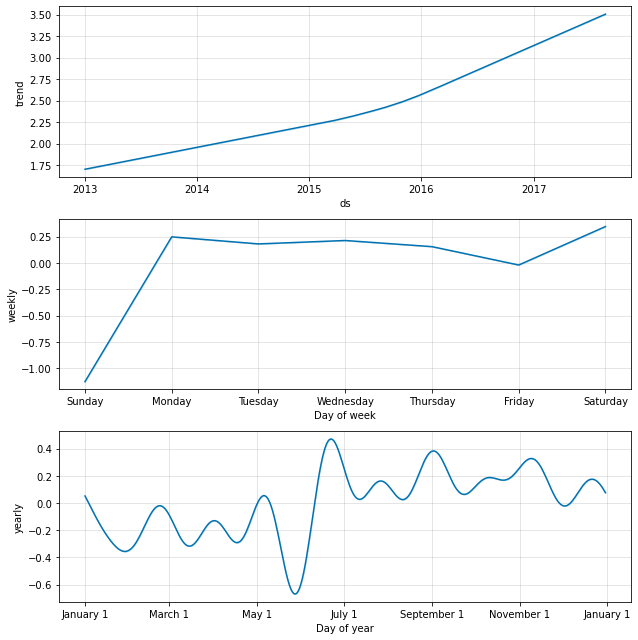

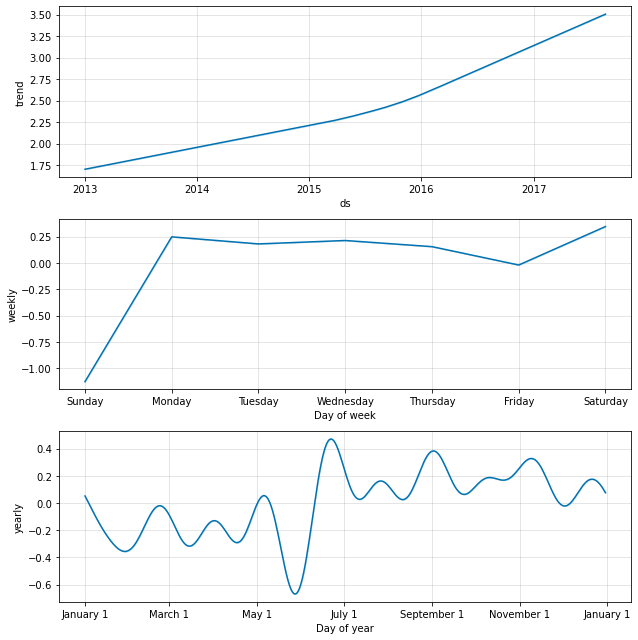

In [41]:
prophet.plot_components(forecast)